In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import measures_calculator,matchY
from torchvision import datasets
from collections import  Counter

import api
imp.reload(api)
import time
import pickle

def set_seed(seed=1):
    import random
    random.seed(seed)
    np.random.seed(seed)

In [2]:
class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name=='PCA_MNIST_5':
            X = pickle.load(open('./embedding/PCA_MNIST_X_5.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_MNIST_Hidden_5.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_MNIST_Y_5.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_MNIST_10':
            X = pickle.load(open('./embedding/PCA_MNIST_X_10.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_MNIST_Hidden_10.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_MNIST_Y_10.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_MNIST_20':
            X = pickle.load(open('./embedding/PCA_MNIST_X_20.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_MNIST_Hidden_20.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_MNIST_Y_20.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_MNIST_30':
            X = pickle.load(open('./embedding/PCA_MNIST_X_30.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_MNIST_Hidden_30.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_MNIST_Y_30.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_FMNIST_5':
            X = pickle.load(open('./embedding/PCA_FMNIST_X_5.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_FMNIST_Hidden_5.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_FMNIST_Y_5.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_FMNIST_10':
            X = pickle.load(open('./embedding/PCA_FMNIST_X_10.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_FMNIST_Hidden_10.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_FMNIST_Y_10.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_FMNIST_20':
            X = pickle.load(open('./embedding/PCA_FMNIST_X_20.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_FMNIST_Hidden_20.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_FMNIST_Y_20.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='PCA_FMNIST_30':
            X = pickle.load(open('./embedding/PCA_FMNIST_X_30.pkl','rb'))
            Hidden = pickle.load(open('./embedding/PCA_FMNIST_Hidden_30.pkl','rb'))
            Y = pickle.load(open('./embedding/PCA_FMNIST_Y_30.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        
        
        if name=='AE_MNIST_5':
            X = pickle.load(open('./embedding/AE_MNIST_X_5.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_MNIST_Hidden_5.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_MNIST_Y_5.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_MNIST_10':
            X = pickle.load(open('./embedding/AE_MNIST_X_10.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_MNIST_Hidden_10.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_MNIST_Y_10.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_MNIST_20':
            X = pickle.load(open('./embedding/AE_MNIST_X_20.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_MNIST_Hidden_20.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_MNIST_Y_20.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_MNIST_30':
            X = pickle.load(open('./embedding/AE_MNIST_X_30.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_MNIST_Hidden_30.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_MNIST_Y_30.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_FMNIST_5':
            X = pickle.load(open('./embedding/AE_FMNIST_X_5.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_FMNIST_Hidden_5.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_FMNIST_Y_5.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_FMNIST_10':
            X = pickle.load(open('./embedding/AE_FMNIST_X_10.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_FMNIST_Hidden_10.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_FMNIST_Y_10.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_FMNIST_20':
            X = pickle.load(open('./embedding/AE_FMNIST_X_20.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_FMNIST_Hidden_20.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_FMNIST_Y_20.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y
        
        if name=='AE_FMNIST_30':
            X = pickle.load(open('./embedding/AE_FMNIST_X_30.pkl','rb'))
            Hidden = pickle.load(open('./embedding/AE_FMNIST_Hidden_30.pkl','rb'))
            Y = pickle.load(open('./embedding/AE_FMNIST_Y_30.pkl','rb'))
            return X,np.ascontiguousarray(Hidden),Y

# GIT

## PCA_MNIST

In [3]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_5')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=70,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 ) # best k:70
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

15.524659156799316


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.478355,0.323289,0.498183,0.426956,1.0,10.0


In [4]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_10')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=70,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 ) # best k:70
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

31.11311960220337


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.691515,0.517411,0.689933,0.594157,1.0,10.0


In [5]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_20')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=80,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 ) # best k:80
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

79.43698692321777


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.77153,0.58755,0.772317,0.645962,1.0,10.0


In [6]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_30')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=90,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 ) # best k:90
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

112.30759406089783


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.599865,0.39328,0.598267,0.489121,1.0,10.0


## PCA_FMNIST

In [7]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_5')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=100,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 ) # best k:100
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

14.622996091842651


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.592528,0.405018,0.594483,0.540378,1.0,10.0


In [52]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_10')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=40,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 ) # best k:40
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

15.780603408813477


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.686799,0.525638,0.68895,0.625705,1.0,10.0


In [8]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_20')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=30,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 ) # best k:30
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

51.649868965148926


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.643216,0.468767,0.6493,0.570878,1.0,10.0


In [9]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_30')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=50,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 ) # best k:50
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

85.56007814407349


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.537525,0.391458,0.538883,0.521743,1.0,10.0


## AE_MNIST

In [78]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_5')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=40,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

11.225326538085938


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.878381,0.773054,0.8779,0.811949,1.0,10.0


In [81]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_10')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=40,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

18.48056650161743


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.861547,0.773402,0.86045,0.811684,1.0,10.0


In [84]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_20')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=40,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

53.87210488319397


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.880494,0.761737,0.880833,0.788283,1.0,10.0


In [88]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_30')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=40,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

80.98424100875854


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.842948,0.717883,0.8466,0.76189,1.0,10.0


## AE_FMNIST

In [104]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_5')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=60,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

14.690261840820312


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.647393,0.488301,0.649067,0.613516,1.0,10.0


In [48]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_10')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=30,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

16.589250326156616


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.554748,0.45508,0.564167,0.601755,1.0,10.0


In [49]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_10')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=50,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

15.799428224563599


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.607032,0.460438,0.615567,0.58677,1.0,10.0


In [44]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_20')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=30,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

190.90498733520508


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.568869,0.473076,0.571183,0.611091,1.0,10.0


In [114]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_20')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=90,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

50.769479751586914


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.577126,0.405767,0.594933,0.576417,1.0,10.0


In [119]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=60,
                  target_ratio=[ 1 for i in range(10)],
                  plot=False,
                 )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

50.6118266582489


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.650498,0.480637,0.650067,0.613325,1.0,10.0


## Plot

In [52]:
import matplotlib.pyplot as plt
import numpy as np

PCA_MNIST_Fscore = [0.478355, 0.691515, 0.77153, 0.599865, 0.520227]
PCA_MNIST_ARI = [0.323289, 0.517411, 0.58755, 0.39328, 0.400188]
PCA_MNIST_NMI = [0.426956,0.594157,0.645962,0.489121,0.528955]


PCA_FMNIST_Fscore = [0.592528,0.686799,0.643216,0.537525,0.551863]
PCA_FMNIST_ARI = [0.405018,0.525638,0.468767,0.391458,0.298914]
PCA_FMNIST_NMI = [0.540378,0.625705,0.570878,0.521743,0.497531]


AE_MNIST_Fscore = [0.878381,0.861547,0.880494,0.842948,0.520227]
AE_MNIST_ARI = [0.773054,0.773402,0.761737,0.717883,0.400188]
AE_MNIST_NMI = [0.811949,0.811684,0.788283,0.76189,0.528955]


AE_FMNIST_Fscore = [0.647393,0.607032,0.568869,0.650498,0.551863]
AE_FMNIST_ARI = [0.488301,0.460438,0.473076,0.480637,0.298914]
AE_FMNIST_NMI = [0.613516,0.58677,0.611091,0.613325,0.497531]

def plot(Fscore,ARI,NMI,sv_name):
    labels = ['5', '10', '20', '30', '784']
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, Fscore, width, label='Fscore')
    rects2 = ax.bar(x , ARI, width, label='ARI')
    rects3 = ax.bar(x + width, NMI, width, label='NMI')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    # ax.set_ylabel('Scores')
    # ax.set_title('Scores by group and gender')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()
    plt.savefig('{}.png'.format(sv_name),bbox_inches = 'tight')
    plt.show()

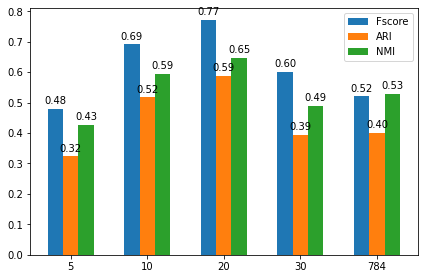

In [53]:
plot(PCA_MNIST_Fscore,PCA_MNIST_ARI,PCA_MNIST_NMI,'PCA_MNIST')

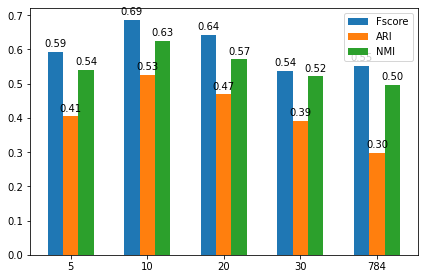

In [54]:
plot(PCA_FMNIST_Fscore,PCA_FMNIST_ARI,PCA_FMNIST_NMI,'PCA_FMNIST')

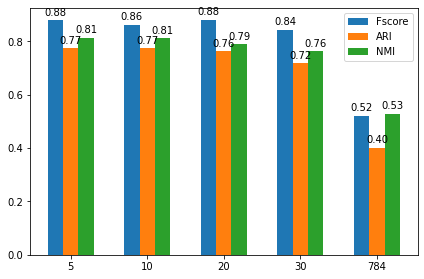

In [55]:
plot(AE_MNIST_Fscore,AE_MNIST_ARI,AE_MNIST_NMI,'AE_MNIST')

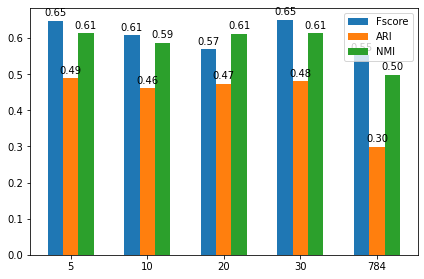

In [56]:
plot(AE_FMNIST_Fscore,AE_FMNIST_ARI,AE_FMNIST_NMI,'AE_FMNIST')

# K-means

In [57]:
from sklearn.cluster import KMeans

## PCA_MNIST

In [58]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_5')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.8482372760772705


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.419655,0.299388,0.4413,0.421465,1.0,10.0


In [59]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_10')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.647979497909546


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.498879,0.336072,0.500033,0.465334,1.0,10.0


In [60]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_20')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

3.0825865268707275


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.467717,0.354218,0.468983,0.48782,1.0,10.0


In [61]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_30')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

5.204756021499634


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.501209,0.358358,0.506267,0.487398,1.0,10.0


## PCA_FMNIST

In [62]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_5')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.8158509731292725


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.492665,0.353489,0.5091,0.500618,1.0,10.0


In [63]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_10')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.8114194869995117


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.515958,0.372107,0.538083,0.509713,1.0,10.0


In [64]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_20')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.681121587753296


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.387934,0.347113,0.43295,0.510647,1.0,10.0


In [65]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_30')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

4.433551549911499


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.3879,0.347575,0.432867,0.511254,1.0,10.0


## AE_MNIST

In [66]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_5')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

1.9161090850830078


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.721353,0.62182,0.735883,0.71435,1.0,10.0


In [67]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_10')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

1.9647939205169678


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.775986,0.65202,0.775783,0.712063,1.0,10.0


In [68]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_20')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

3.120332956314087


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.519486,0.410576,0.532267,0.549191,1.0,10.0


In [69]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_30')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

3.2482995986938477


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.485933,0.359742,0.493017,0.496313,1.0,10.0


## AE_FMNIST

In [70]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_5')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.752959966659546


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.39582,0.443253,0.4466,0.622007,1.0,10.0


In [71]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_10')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.933946371078491


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.546557,0.437583,0.562833,0.604287,1.0,10.0


In [72]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_20')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.3604626655578613


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.527729,0.423179,0.546183,0.591215,1.0,10.0


In [73]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
kmeans = KMeans(n_clusters=10, random_state=2021).fit(X)
Y_pred = kmeans.labels_
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

3.511320114135742


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.503655,0.391045,0.519617,0.569532,1.0,10.0


# SpectACI

In [3]:
from Spectacl import Spectacl

## PCA_MNIST

In [7]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_5')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.2,n_jobs=100)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

98.72368478775024


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.305144,0.198917,0.3114,0.308698,1.0,10.0


In [12]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_10')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.3)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

121.19405364990234


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.390322,0.216699,0.387767,0.343752,1.0,10.0


In [14]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_20')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.3)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

80.93693256378174


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.36481,0.153961,0.3506,0.378408,1.0,10.0


In [20]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.4)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

167.06888008117676


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.388679,0.192028,0.371567,0.360662,1.0,10.0


## PCA_FMNIST

In [21]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_5')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.2)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

80.46734881401062


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.435895,0.320548,0.458183,0.472758,1.0,10.0


In [70]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_10')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.15)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

34.643465518951416


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.485612,0.257204,0.493167,0.477547,1.0,10.0


In [22]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_10')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.2)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

58.47380447387695


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.469618,0.333686,0.489833,0.497712,1.0,10.0


In [69]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_10')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.25)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

97.115797996521


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.465631,0.359385,0.487617,0.488648,1.0,10.0


In [71]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_10')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.3)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

158.36425638198853


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.411465,0.309837,0.444033,0.471122,1.0,10.0


In [23]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_20')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.2)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

46.535404205322266


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.419684,0.239782,0.441983,0.445725,1.0,10.0


In [33]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_20')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.3)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

137.40743374824524


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.449971,0.290046,0.462933,0.452409,1.0,10.0


In [24]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=0.2)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

38.68805432319641


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.467485,0.164282,0.458483,0.413758,1.0,10.0


## AE_MNIST

In [40]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_5')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=2)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

58.10858917236328


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.654951,0.360105,0.624583,0.588709,1.0,10.0


In [44]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_10')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=3)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

85.70379042625427


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.621669,0.404547,0.597117,0.610807,1.0,10.0


In [48]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_20')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=5)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

147.547705411911


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.501961,0.298199,0.502317,0.485248,1.0,10.0


In [51]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=5)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

128.6518199443817


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.426737,0.160274,0.41305,0.486093,1.0,10.0


In [53]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=6)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

163.93201518058777


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.424814,0.234217,0.424667,0.424689,1.0,10.0


## AE_FMNIST

In [54]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_5')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=3)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

235.74428749084473


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.470541,0.27052,0.46325,0.436317,1.0,10.0


In [56]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_10')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=3)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

144.0737762451172


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.493084,0.331148,0.502433,0.486945,1.0,10.0


In [64]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_20')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=4)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

123.31699657440186


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.477636,0.271093,0.470383,0.456969,1.0,10.0


In [60]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=5)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

202.16275477409363


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.365753,0.281091,0.391583,0.431935,1.0,10.0


In [66]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=6)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

294.2078459262848


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.26892,0.257607,0.302717,0.404935,1.0,10.0


In [65]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=7)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

411.01609468460083


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.325865,0.244033,0.348017,0.424157,1.0,10.0


In [16]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=8)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

479.6809666156769


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.378715,0.223732,0.380717,0.383932,1.0,10.0


In [68]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=9)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

812.2463312149048


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.256401,0.134301,0.273033,0.290453,1.0,10.0


In [67]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=10)
Y_pred = s.fit_predict(X)
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

952.3554849624634


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.25069,0.091486,0.264383,0.18117,1.0,10.0


# QuickshiftPP

In [83]:
from QuickshiftPP import *

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## PCA_MNIST

In [95]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_5')

t1=time.time()
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

2.0702097415924072


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.245804,0.172721,0.34125,0.36741,1.0,10.0


In [96]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_10')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

11.59522294998169


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.646372,0.528246,0.6858,0.615736,1.0,11.0


In [97]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_20')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

35.317593574523926


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.486525,0.460488,0.508083,0.639379,1.0,11.0


In [98]:
X_raw,X,Y_true=DataLoader.load('PCA_MNIST_30')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

73.658926486969


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.541622,0.267501,0.504767,0.556068,1.0,11.0


## PCA_FMNIST

In [99]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_5')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

3.7989919185638428


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.422668,0.345484,0.486983,0.546849,1.0,10.0


In [100]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_10')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

5.915688991546631


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.424779,0.343422,0.4408,0.515399,1.0,11.0


In [101]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_20')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

11.47262692451477


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.402471,0.144446,0.390467,0.403736,1.0,11.0


In [102]:
X_raw,X,Y_true=DataLoader.load('PCA_FMNIST_30')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

25.66669511795044


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.382822,0.107868,0.362417,0.378115,1.0,11.0


## AE_MNIST

In [103]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_5')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

4.119349479675293


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.779808,0.733119,0.810667,0.817691,1.0,11.0


In [104]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_10')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

11.561985969543457


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.739898,0.705391,0.751867,0.80835,1.0,11.0


In [105]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_20')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

51.440797328948975


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.785197,0.643615,0.761867,0.768557,1.0,11.0


In [106]:
X_raw,X,Y_true=DataLoader.load('AE_MNIST_30')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

86.56697821617126


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.680408,0.415365,0.643417,0.65931,1.0,11.0


## AE_FMNIST

In [107]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_5')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

4.131582975387573


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.345888,0.328888,0.4332,0.539697,1.0,10.0


In [108]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_10')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

9.636483430862427


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.4461,0.373777,0.48945,0.591802,1.0,11.0


In [109]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_20')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

26.8263738155365


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.384507,0.234928,0.397133,0.490564,1.0,11.0


In [110]:
X_raw,X,Y_true=DataLoader.load('AE_FMNIST_30')

t1=time.time()
model = QuickshiftPP(k=50,beta=0.5)
model.fit(X)
Y_pred = model.memberships
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

52.33619451522827


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.370655,0.141523,0.356967,0.402852,1.0,11.0
